In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xlearn as xl

In [3]:
data = pd.read_csv('../data/data.csv')
# убюраем ненужные нам фичи из датасета
data.drop('banner_id0', inplace=True, axis=1)
data.drop('banner_id1', inplace=True, axis=1)
data.drop('rate0', inplace=True, axis=1)
data.drop('rate1', inplace=True, axis=1)
data.drop('g0', inplace=True, axis=1)
data.drop('g1', inplace=True, axis=1)
data.drop('coeff_sum0', inplace=True, axis=1)
data.drop('coeff_sum1', inplace=True, axis=1)
data.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,impressions,clicks
0,2021-09-27 00:01:30.000000,0,0,5664530014561852622,0,0,0,1,1
1,2021-09-26 22:54:49.000000,1,1,5186611064559013950,0,0,1,1,1
2,2021-09-26 23:57:20.000000,2,2,2215519569292448030,3,0,0,1,1
3,2021-09-27 00:04:30.000000,3,3,6262169206735077204,0,1,1,1,1
4,2021-09-27 00:06:21.000000,4,4,4778985830203613115,0,1,0,1,1


In [4]:
# добавим ещё одну фичу с часами
data['hour'] = pd.to_datetime(data['date_time']).dt.hour
data['date'] = pd.to_datetime(data['date_time']).dt.date

hour values:  24


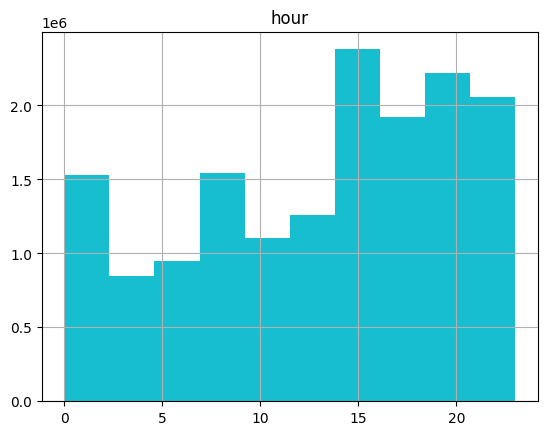

zone_id values:  3444


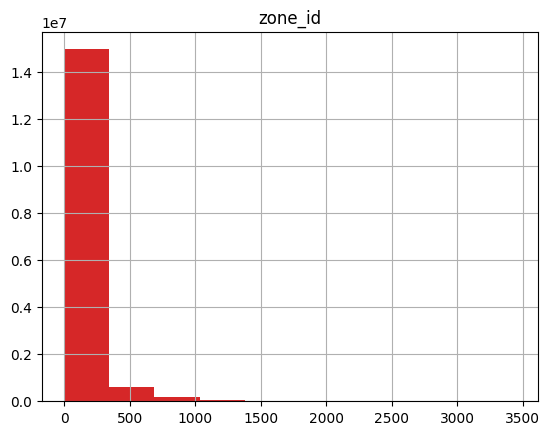

banner_id values:  1633


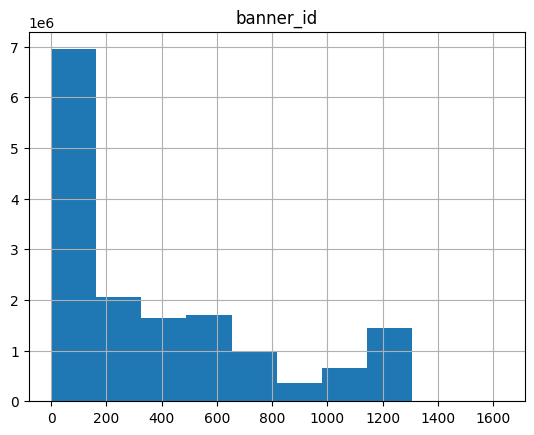

campaign_clicks values:  822


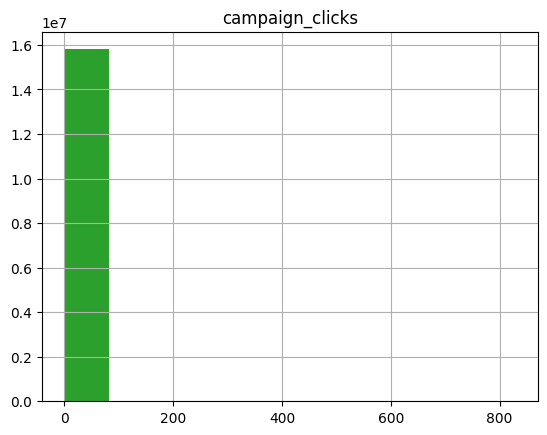

os_id values:  11


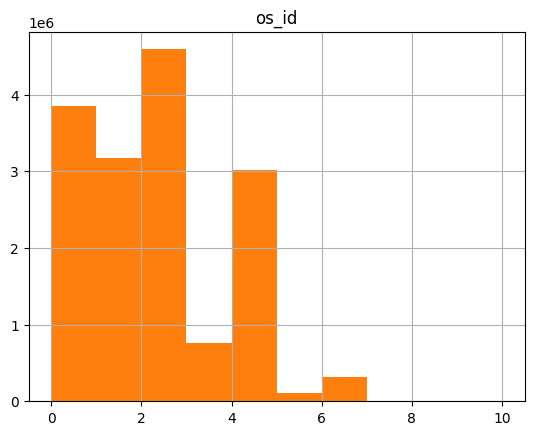

impressions values:  1


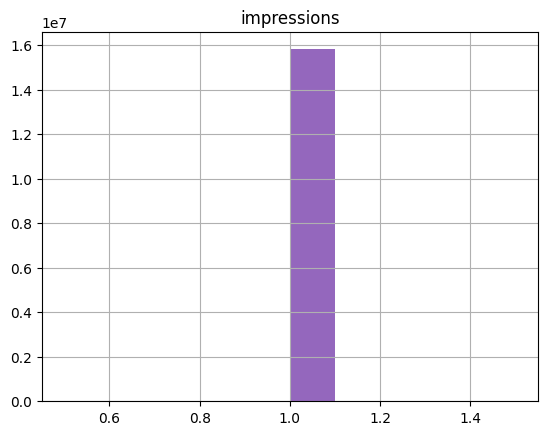

oaid_hash values:  6510316


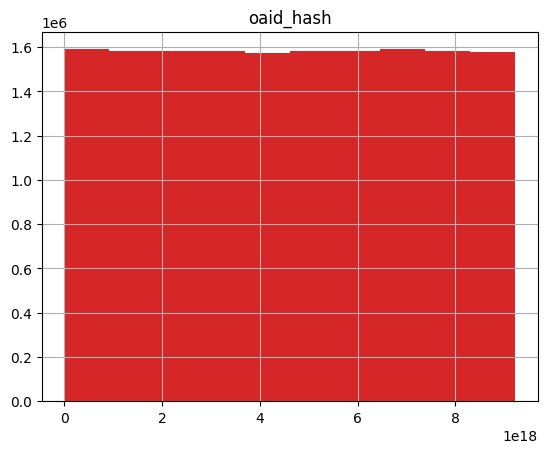

clicks values:  2


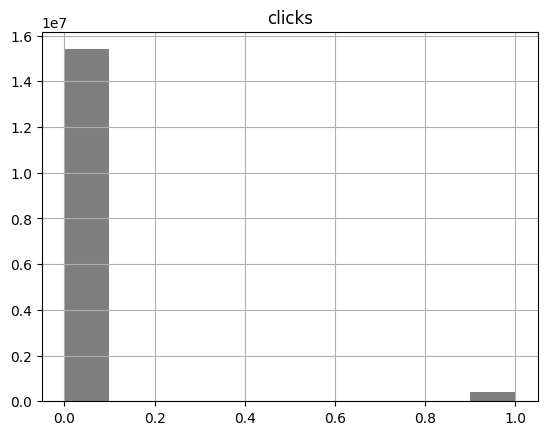

In [5]:
def analysis(dataFrame: pd.DataFrame):

    # часы
    dataFrame.hist('hour', color='tab:cyan')
    print('hour values: ', len(dataFrame['hour'].unique()))
    plt.show()

    # id места на сайте 
    dataFrame.hist('zone_id', color='tab:red')
    print('zone_id values: ', len(dataFrame['zone_id'].unique()))
    plt.show()

    # id баннера
    dataFrame.hist('banner_id', color='tab:blue')
    print('banner_id values: ', len(dataFrame['banner_id'].unique()))
    plt.show()

    # показы кампании 
    dataFrame.hist('campaign_clicks', color='tab:green')
    print('campaign_clicks values: ', len(dataFrame['campaign_clicks'].unique()))
    plt.show()

    # операционная система
    dataFrame.hist('os_id', color='tab:orange')
    print('os_id values: ', len(dataFrame['os_id'].unique()))
    plt.show()

    # показы
    dataFrame.hist('impressions', color='tab:purple')
    print('impressions values: ', len(dataFrame['impressions'].unique()))
    plt.show()

    # хеши
    dataFrame.hist('oaid_hash', color='tab:red')
    print('oaid_hash values: ', len(dataFrame['oaid_hash'].unique()))
    plt.show()

    # клики
    dataFrame.hist('clicks', color='tab:gray')
    print('clicks values: ', len(dataFrame['clicks'].unique()))
    plt.show()

analysis(data)

In [6]:
# Так как impressions на всём датасете принимает значение 1, то от этой фичи можно отказаться. Для остальных же применим oneHotEncoding;
data.drop('impressions', inplace=True, axis=1)

In [7]:
# Находим дату последнего дня
data['date'].max()
# До сих пор изменений почти не было по сравнению с первым дз; Сейчас только одну фичу с хешем не убираю и добавил её на график, соответсвенно

datetime.date(2021, 10, 2)

In [8]:
from sklearn. preprocessing import OneHotEncoder
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss, roc_auc_score


In [9]:
# Будем использовать xlearn для построения ffm. Для начала подготовим данные для этого: разделим на выборки

def feature_engineering(dataFrame: pd.DataFrame):
    # отделяем последний день
    splitDate = datetime.date(2021, 10, 2)
    train = dataFrame[dataFrame['date'] != splitDate]
    lastDay = dataFrame[dataFrame['date'] == splitDate]
    # делим на тренировочную и тестовую выборки 
    X_train = train[['hour', 'zone_id', 'banner_id', 'campaign_clicks', 'os_id', 'clicks', 'oaid_hash']].values
    X_test = lastDay[['hour', 'zone_id', 'banner_id', 'campaign_clicks', 'os_id', 'clicks', 'oaid_hash']].values
    
    
    return X_train, X_test

X_train, X_test = feature_engineering(data)
print(X_train, X_test)

[[                  0                   0                   0 ...
                    0                   1 5664530014561852622]
 [                 22                   1                   1 ...
                    0                   1 5186611064559013950]
 [                 23                   2                   2 ...
                    0                   1 2215519569292448030]
 ...
 [                 22                  12                  22 ...
                    1                   0  453968700792456599]
 [                  0                 967                  21 ...
                    0                   0 6968514095695555037]
 [                  7                  19                 635 ...
                    0                   0 8754492963501134426]] [[                  0                   8                  76 ...
                    1                   1 8008530729166508034]
 [                  0                  14                  46 ...
                    6    

In [10]:
# Зададим конфиг для кодирования
GOAL = ['clicks']
NUMERICAL_FEATURES = ['campaign_clicks']
CATEGORICAL_FEATURES = ['hour', 'zone_id', 'banner_id', 'os_id', 'oaid_hash']
ALL_FEATURES = ['hour', 'zone_id', 'banner_id', 'os_id', 'oaid_hash', 'campaign_clicks']
NUM_THREADS = 8

In [11]:
# Зададим encoder
encoder = {"currentcode": len(NUMERICAL_FEATURES),
           "catdict": {},
           "catcodes": {}}

In [12]:
# Переводим в libffm формат
from utils import _convert_to_ffm

In [12]:
# в процессе выполнения у меня зависает notebook, но в файлs всё записалось, так что я не перезапускал эти конверторы;
encoder = _convert_to_ffm('../data/', X_train, 'X_train', GOAL[0],
                          NUMERICAL_FEATURES,
                          CATEGORICAL_FEATURES,
                          ALL_FEATURES,
                          encoder)

encoder = _convert_to_ffm('../data/', X_test, 'X_test', GOAL[0],
                          NUMERICAL_FEATURES,
                          CATEGORICAL_FEATURES,
                          ALL_FEATURES,
                          encoder)
# функцию для перевода в libffm формат брал отсюда: https://github.com/wngaw/blog/blob/master/xlearn_example/src/utils.py

convert_to_ffm - START
UPDATING CATDICT: numeric field - campaign_clicks
UPDATING CATDICT: categorical field - hour
UPDATING CATDICT: categorical field - zone_id
UPDATING CATDICT: categorical field - banner_id
UPDATING CATDICT: categorical field - os_id
UPDATING CATDICT: categorical field - oaid_hash


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [3]:
# создаём модель и тренируем
ffm_model = xl.create_ffm()
ffm_model.setTrain("../data/X_train_ffm.txt")
ffm_model.setValidate("../data/X_test_ffm.txt")
ffm_model.setPreModel("../trained_models/model.out")
param = {'task': 'binary', 'lr': 0.2, 'lambda': 0.002, 'metric': 'auc'}
ffm_model.fit(param, "../trained_models/model.out")

----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 10 threads for training task.
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (../data/X_train_ffm.txt.bin) found. Skip converting text to binary.
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (../data/X_test_ffm.txt.bin) found. Skip converting text to binary.
[------------] Number of Feature: 5049308
[------------] Number of Field: 6
[------------] Time cost for reading problem: 7.62 (s

In [ ]:
# Итого, лучшие AUC=0.800344 и log_loss=0.129845
# В прошлый раз они были AUC=0.7690227149066888 и log_loss=0.13596558210740278
# Улучшили результат))